In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_model.csv')

In [3]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)
df.head()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,0,0,1,2,0,0,0,0,0,0.0,1,1,1,0.758426,-0.278080,0.286083
1,0,1,0,2,1,0,0,0,0,0,2,0.0,1,2,1,1.613592,-0.873018,0.213067
2,0,1,0,1,0,0,2,0,0,0,2,0.0,1,0,1,-0.911184,0.692433,-0.646863
3,1,1,0,0,1,2,0,0,0,0,0,0.0,1,0,1,-0.829739,-1.486236,-0.888808
4,0,0,0,1,0,0,0,0,0,0,0,0.0,1,3,1,0.391927,0.057611,0.212957


In [4]:
X = df.drop(['Churn'],axis = 1)
y = df.loc[:,'Churn']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 8)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [8]:
params = {'n_estimators':[20,40,60,80,100],
          'max_features':['sqrt',0.25,0.50,0.75,1],
          'min_samples_split':[2,4,6]}

In [9]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(rf,params,cv = 10,random_state = 8)
search.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ['sqrt', 0.25, 0.5,
                                                         0.75, 1],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [20, 40, 60, 80, 100]},
                   random_state=8)

In [10]:
search.best_estimator_

RandomForestClassifier(max_features='sqrt', n_estimators=80)

In [11]:
rf2 = search.best_estimator_
model_rf = rf2.fit(X_train,y_train)

In [12]:
y_pred = model_rf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc,roc_auc_score

In [14]:
accuracy_score(y_pred,y_test)

0.8864185596906718

In [15]:
print(confusion_matrix(y_pred,y_test))

[[ 828   53]
 [ 182 1006]]


In [16]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       881
           1       0.95      0.85      0.90      1188

    accuracy                           0.89      2069
   macro avg       0.88      0.89      0.89      2069
weighted avg       0.89      0.89      0.89      2069



In [17]:
roc_auc_score(y_pred,y_test)

0.8933212182360877

In [18]:
y_pred_prob = model_rf.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.9672510027206687

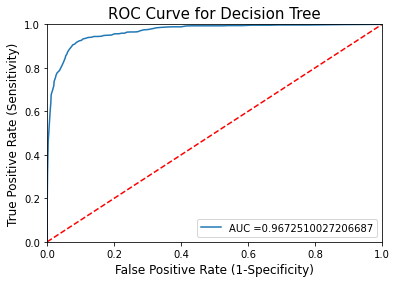

In [20]:
plt.title('ROC Curve for Decision Tree',size = 15)
plt.xlabel('False Positive Rate (1-Specificity)',size = 12)
plt.ylabel('True Positive Rate (Sensitivity)',size = 12)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()